In [1]:
#Importing the necessary libraries
import pandas as pd

In [2]:
import requests

In [3]:
#Requested data from api.opencorporates (lookink for all companies with the word "smart" in their name)
json_data = requests.get('https://api.opencorporates.com/companies/search?q=smart').json()

#Please note, the total number results is "per_page":30,"total_pages":3795,"total_count":113849, however due to the fact that I am using an open API account without an API token I can only retrieve the 1st page which includes a number of 30 companies. I have submitted a request to create a free OpenCorporates account, it takes over 48 HRS to complete and I need to submit a case as to how will I be contributing to the open source community.
#https://api.opencorporates.com/v0.4.8/companies/search?q=smart

In [4]:
#Normalize semi-structured JSON data into a flat table.
from pandas.io.json import json_normalize

In [5]:
df = None
for row in json_data["results"]["companies"]:
    if df is None:
        df = json_normalize(row["company"])
    else:
        df = pd.concat([df, json_normalize(row["company"])], sort=False)

In [6]:
df.to_csv('companynew.csv', index=False, encoding='utf-8')

In [7]:
#Visual inspection of the newly created .csv file
df.head()

,name,company_number,jurisdiction_code,incorporation_date,dissolution_date,company_type,registry_url,branch,branch_status,inactive,...,source.url,source.retrieved_at,registered_address.street_address,registered_address.locality,registered_address.region,registered_address.postal_code,registered_address.country,registered_address,source.terms,source.terms_url
0,"! ! ! 1ST CHOICE ANDROID SMART-PHONE TUTORING,...",C3517133,us_ca,2012-11-02,None,DOMESTIC STOCK,https://businessfilings.sos.ca.gov/frmDetail.a...,None,None,True,...,https://businessfilings.sos.ca.gov/frmDetail.a...,2019-11-28T01:23:56+00:00,420 N MCKINLEY ST #111-182\nCORONA CA 92879,None,None,None,United States,NaN,NaN,NaN
0,""" SMART ARROWS "" K. I I. STRZAŁA - SPÓŁKA JAWNA",0000011037,pl,2001-05-15,None,SPÓŁKA JAWNA,https://ems.ms.gov.pl/krs/wyszukiwaniepodmiotu...,None,None,None,...,https://ems.ms.gov.pl/krs/wyszukiwaniepodmiotu...,2011-10-18T08:32:07+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,""" SmArt Tree "" Grup SRL",17212920,ro,None,None,Societate cu răspundere limitată,None,None,None,True,...,http://data.gov.ro/,2019-08-11T18:30:00+00:00,"Comuna Baloteşti, Str. FERMEI, Nr. 56, Județ I...",Sat Săftica,,None,Romania,NaN,Romanian Open Government Licence (OGL-ROU-1.0),http://data.gov.ro/base/images/logoinst/OGL-RO...
0,"""""СМАРТ АЙДИЪС"""" ЕООД",203096552,bg,2014-06-09,None,Single Limited Liability Company (Еднолично Др...,https://public.brra.bg/CheckUps/Verifications/...,None,None,False,...,https://opendata.government.bg/dataset/tbprobc...,2016-04-19T00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Commons CC Zero License (cc-zero),https://opendata.government.bg/dataset/tbprobc...
0,"""""СМАРТ КАР 1"""" ЕООД",202022360,bg,2012-04-18,None,Single Limited Liability Company (Еднолично Др...,https://public.brra.bg/CheckUps/Verifications/...,None,None,False,...,https://opendata.government.bg/dataset/tbprobc...,2017-07-13T00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Commons CC Zero License (cc-zero),https://opendata.government.bg/dataset/tbprobc...


In [8]:
#visual inspection
df.describe

<bound method NDFrame.describe of                                                 name   company_number  \
0  ! ! ! 1ST CHOICE ANDROID SMART-PHONE TUTORING,...         C3517133   
0    " SMART ARROWS " K. I I. STRZAŁA - SPÓŁKA JAWNA       0000011037   
0                            " SmArt Tree " Grup SRL         17212920   
0                              ""СМАРТ АЙДИЪС"" ЕООД        203096552   
0                               ""СМАРТ КАР 1"" ЕООД        202022360   
0                   "1" SMART TRAVELER VENDING, INC.     P96000079505   
0                       "4 СМАРТ ФОУН СОЛЮШЪНС" ЕООД        202818005   
0  "AGRO SMART" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIAL...       0000216376   
0                           "Act Smart Beach Tennis"      40008248929   
0        "B-SMART" SMARTPHONE BOUTIQUE & REPAIRS LLC     L14000064235   
0                               "BEE" SMART KIDS LLC        35988082K   
0                      "FOR SMART BUYERS ONLY", INC.           M68684   
0                

In [9]:
df.head(n=5)

,name,company_number,jurisdiction_code,incorporation_date,dissolution_date,company_type,registry_url,branch,branch_status,inactive,...,source.url,source.retrieved_at,registered_address.street_address,registered_address.locality,registered_address.region,registered_address.postal_code,registered_address.country,registered_address,source.terms,source.terms_url
0,"! ! ! 1ST CHOICE ANDROID SMART-PHONE TUTORING,...",C3517133,us_ca,2012-11-02,None,DOMESTIC STOCK,https://businessfilings.sos.ca.gov/frmDetail.a...,None,None,True,...,https://businessfilings.sos.ca.gov/frmDetail.a...,2019-11-28T01:23:56+00:00,420 N MCKINLEY ST #111-182\nCORONA CA 92879,None,None,None,United States,NaN,NaN,NaN
0,""" SMART ARROWS "" K. I I. STRZAŁA - SPÓŁKA JAWNA",0000011037,pl,2001-05-15,None,SPÓŁKA JAWNA,https://ems.ms.gov.pl/krs/wyszukiwaniepodmiotu...,None,None,None,...,https://ems.ms.gov.pl/krs/wyszukiwaniepodmiotu...,2011-10-18T08:32:07+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,""" SmArt Tree "" Grup SRL",17212920,ro,None,None,Societate cu răspundere limitată,None,None,None,True,...,http://data.gov.ro/,2019-08-11T18:30:00+00:00,"Comuna Baloteşti, Str. FERMEI, Nr. 56, Județ I...",Sat Săftica,,None,Romania,NaN,Romanian Open Government Licence (OGL-ROU-1.0),http://data.gov.ro/base/images/logoinst/OGL-RO...
0,"""""СМАРТ АЙДИЪС"""" ЕООД",203096552,bg,2014-06-09,None,Single Limited Liability Company (Еднолично Др...,https://public.brra.bg/CheckUps/Verifications/...,None,None,False,...,https://opendata.government.bg/dataset/tbprobc...,2016-04-19T00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Commons CC Zero License (cc-zero),https://opendata.government.bg/dataset/tbprobc...
0,"""""СМАРТ КАР 1"""" ЕООД",202022360,bg,2012-04-18,None,Single Limited Liability Company (Еднолично Др...,https://public.brra.bg/CheckUps/Verifications/...,None,None,False,...,https://opendata.government.bg/dataset/tbprobc...,2017-07-13T00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Commons CC Zero License (cc-zero),https://opendata.government.bg/dataset/tbprobc...


In [10]:
#listing all items in the table header (columns heads)
list(df)

['name',
 'company_number',
 'jurisdiction_code',
 'incorporation_date',
 'dissolution_date',
 'company_type',
 'registry_url',
 'branch',
 'branch_status',
 'inactive',
 'current_status',
 'created_at',
 'updated_at',
 'retrieved_at',
 'opencorporates_url',
 'previous_names',
 'registered_address_in_full',
 'industry_codes',
 'restricted_for_marketing',
 'native_company_number',
 'source.publisher',
 'source.url',
 'source.retrieved_at',
 'registered_address.street_address',
 'registered_address.locality',
 'registered_address.region',
 'registered_address.postal_code',
 'registered_address.country',
 'registered_address',
 'source.terms',
 'source.terms_url']

In [11]:
#checking data types
df.dtypes

name                                 object
company_number                       object
jurisdiction_code                    object
incorporation_date                   object
dissolution_date                     object
company_type                         object
registry_url                         object
branch                               object
branch_status                        object
inactive                             object
current_status                       object
created_at                           object
updated_at                           object
retrieved_at                         object
opencorporates_url                   object
previous_names                       object
registered_address_in_full           object
industry_codes                       object
restricted_for_marketing             object
native_company_number                object
source.publisher                     object
source.url                           object
source.retrieved_at             

In [12]:
df.memory_usage()

Index                                240
name                                 240
company_number                       240
jurisdiction_code                    240
incorporation_date                   240
dissolution_date                     240
company_type                         240
registry_url                         240
branch                               240
branch_status                        240
inactive                             240
current_status                       240
created_at                           240
updated_at                           240
retrieved_at                         240
opencorporates_url                   240
previous_names                       240
registered_address_in_full           240
industry_codes                       240
restricted_for_marketing             240
native_company_number                240
source.publisher                     240
source.url                           240
source.retrieved_at                  240
registered_addre

In [13]:
#I have manually uploded this table, companynew.csv to Hortonworks/ Cloudera Sandbox Data Platform, within the HDFS cluster. Please see the creenshot below.

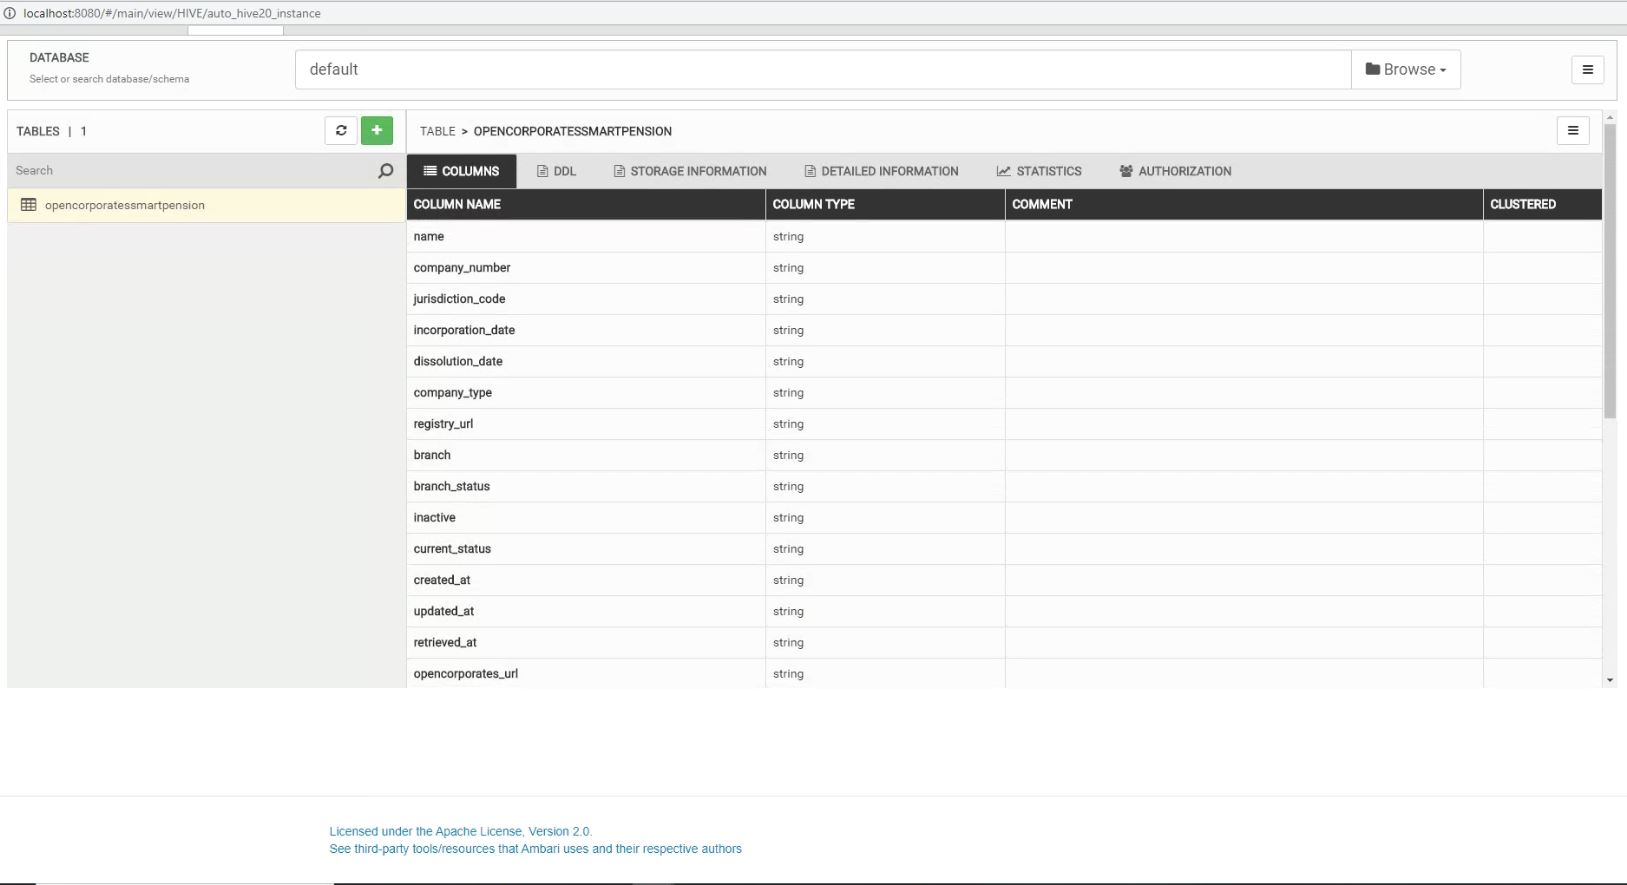

In [16]:
from IPython.display import Image
Image(filename="Ambari.JPG", width=950, height=950)

In [17]:
#There are several online articles and online resources regarding the Beneficial Ownership. As per OpenCorporates own blog, The use cases are showing that the business impetus for beneficial ownership transparency goes far beyond compliance, contributing to risk management, and competitive advantage.